In [9]:
import pandas as pd
import numpy as np
from datetime import date
reddit_df = pd.read_csv('./100k_random_reddit_2018.csv')
reddit_df.head()

,created_utc,subreddit,author,comment_length,score
0,1514764841,Astronomy,illuminatiisnowhere,50,3
1,1514764972,politics,ExtracurricularSpork,31,10
2,1514765017,frugalmalefashion,TheBarnhouseEffect,126,5
3,1514765217,KansasCityChiefs,thenewguyreddit,48,5
4,1514765360,Aeon,ribnag,385,1


In [ ]:
reddit_df.head()

In [ ]:
# Exercise 1
#Sort the data frame by score and select the rows with the 10th to 20th highest scores.

score_sorted = reddit_df.sort_values('score', ascending=False)
ten_to_twenty = score_sorted[10:21]
print(ten_to_twenty)

In [ ]:
#Exercise 2
#Now, how would you select just the subreddit and comment_length columns for the rows you selected above?
score_sorted = reddit_df.sort_values('score', ascending=False)
ten_to_twenty = score_sorted[10:21]
those_columns = ten_to_twenty.iloc[:, [1,3]]
print(those_columns)


In [ ]:
those_columns = score_sorted.iloc[9:20, [1,3]]
print(those_columns)

In [ ]:
# Exercise 3
# Find the average (mean) comment length for each subreddit and sort by comment length
reddit_df.groupby('subreddit').comment_length.mean().sort_values() 

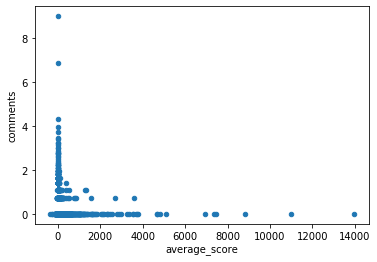

In [15]:
# Exercise 4
# Plot the number of comments and average score. Are frequent posters more likely to share comments that are well-received?
# Hint: You will want to use a dataframe that groups the data by person
plot_df = reddit_df.groupby('author')
comments = np.log(plot_df.size())
average_score = plot_df.score.mean()
person_df = pd.DataFrame({'comments': comments,
                          'average_score': average_score})
person_df.plot.scatter (x = 'average_score', y = 'comments')

grouped_df = reddit_df.groupby('author')


C:\Users\natha\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


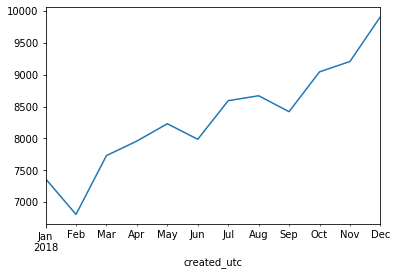

In [16]:
# Exercise 5
# Plot the number of comments per month over the year.
reddit_df.index = pd.to_datetime(reddit_df.created_utc, unit='s', utc=True)
reddit_df['num_comments'] = 1
monthly_comments = reddit_df.resample('M').num_comments.sum()
monthly_comments.plot()

In [ ]:
#Exercise 6
#See if you can figure out how to change the above plot so that instead of showing one overall line for comments per hour, it shows a line for each day of the week (e.g., a line for comments per hour on Mondays, another for Tuesdays, etc.)

reddit_df.index = pd.to_datetime(reddit_df.created_utc, unit='s', utc=True)
reddit_df['num_comments'] = 1
monday_comments = reddit_df.resample('d').num_comments.sum()[::7]
tuesday_comments = reddit_df.resample('d').num_comments.sum()[1::7]
wednesday_comments = reddit_df.resample('d').num_comments.sum()[2::7]
thursday_comments = reddit_df.resample('d').num_comments.sum()[3::7]
friday_comments = reddit_df.resample('d').num_comments.sum()[4::7]
saturday_comments = reddit_df.resample('d').num_comments.sum()[5::7]
sunday_comments = reddit_df.resample('d').num_comments.sum()[6::7]
monday_comments.plot(color = 'black', linewidth=.3)
tuesday_comments.plot(color = 'green', linewidth=.3)
wednesday_comments.plot(color = 'yellow', linewidth=.3)
thursday_comments.plot(color = 'orange', linewidth=.3)
friday_comments.plot(color = 'red', linewidth=.3)
saturday_comments.plot(color = 'teal', linewidth=.3)
sunday_comments.plot(color = 'blue', linewidth=.3)


In [7]:
# Exercise 6 continued
from datetime import datetime
day_list = []
for time in reddit_df['created_utc']:
    ts = int(time)
    if datetime.utcfromtimestamp(ts).strftime('%A') == "Monday":
        day_list.append("Monday")
    if datetime.utcfromtimestamp(ts).strftime('%A') == "Tuesday":
        day_list.append("Tuesday")
    if datetime.utcfromtimestamp(ts).strftime('%A') == "Wednesday":
        day_list.append("Wednesday")
    if datetime.utcfromtimestamp(ts).strftime('%A') == "Thursday":
        day_list.append("Thursday")
    if datetime.utcfromtimestamp(ts).strftime('%A') == "Friday":
        day_list.append("Friday")
    if datetime.utcfromtimestamp(ts).strftime('%A') == "Saturday":
        day_list.append("Saturday")
    if datetime.utcfromtimestamp(ts).strftime('%A') == "Sunday":
        day_list.append("Sunday")
        
reddit_df["day"] = day_list        



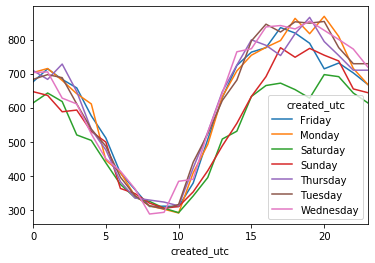

In [28]:
reddit_df.groupby([reddit_df.index.hour, reddit_df.index.weekday_name]).num_comments.sum().unstack().plot() 